In [293]:
import pandas as pd
import numpy as np
from modules.util import load_result_df
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from scipy import stats


In [294]:
d20 = load_result_df(r'data/f1_20.csv')
d40 = load_result_df(r'data/f1_40.csv')
d50 = load_result_df(r'data/f1_50.csv')
d60 = load_result_df(r'data/f1_60.csv')
d80 = load_result_df(r'data/f1_80.csv')

df = pd.concat([d20, d40, d50, d60,d80], ignore_index= True)
df['budget'] = ((df['AddRatio'] + df['RemoveRatio']) *100).astype(int)


In [295]:
len(d20)

2400

In [296]:
df['AccuracyChange'] = (df.PerturbedTestAccuracy - df.Test_Accuracy) *100
df['F1MacroChange'] = (df.PerturbedF1Macro - df.F1Macro) *100
df['HomophilyChange'] = (df.PerturbedHomophily - df.Homophily) 

df = df[df.AccuracyChange <0 ].reset_index(drop = True)
# df.AccuracyChange = df.AccuracyChange.abs()
# df.F1MacroChange = df.F1MacroChange.abs()


In [297]:
df

,AddRatio,RemoveRatio,PerturbType,Test_Accuracy,PerturbedTestAccuracy,AccuracyChange,F1Macro,PerturbedF1Macro,F1MacroChange,DistMetric,DegreeMetric,Homophily,PerturbedHomophily,HomophilyChange,budget
0,0.2,0.0,add,0.817227,0.797269,-1.995796,0.8036,0.782679,-2.092075,6.334309,3.935978,80.41,69.257143,-11.152857,20
1,0.2,0.0,add,0.817227,0.785714,-3.151268,0.8036,0.774980,-2.861959,6.341440,4.101132,80.41,69.387755,-11.022245,20
2,0.2,0.0,add,0.817227,0.785189,-3.203779,0.8036,0.770114,-3.348523,6.272821,4.026798,80.41,70.089796,-10.320204,20
3,0.2,0.0,add,0.817227,0.792542,-2.468485,0.8036,0.778727,-2.487278,6.243956,4.172662,80.41,69.518367,-10.891633,20
4,0.2,0.0,add,0.817227,0.790441,-2.678573,0.8036,0.776668,-2.693206,6.313237,4.091978,80.41,69.551020,-10.858980,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.8,remove,0.817227,0.723740,-9.348738,0.8036,0.705624,-9.797537,5.505014,4.264932,80.41,79.669031,-0.740969,80
11996,0.0,0.8,remove,0.817227,0.725315,-9.191167,0.8036,0.703728,-9.987152,5.500377,4.256596,80.41,82.033097,1.623097,80
11997,0.0,0.8,remove,0.817227,0.720588,-9.663868,0.8036,0.697527,-10.607314,5.488476,4.269116,80.41,81.442080,1.032080,80
11998,0.0,0.8,remove,0.817227,0.733718,-8.350843,0.8036,0.710569,-9.303087,5.504826,4.281732,80.41,79.550827,-0.859173,80


In [298]:
perturbation_remap = {'remove': 'Delete',
                      'add': 'Add',
                      'addremove': 'Add/Delete'}

def make_legend_nice(ax, hue_order, **kwargs):
    handles, _ = ax.get_legend_handles_labels()
    new_handles = [perturbation_remap[i] for i in hue_order]
    [handle.set_label(label) for handle, label in zip(handles, new_handles)]
    ax.legend(ncol=2, columnspacing=0.3, loc = 'best')
    
def add_grid(ax):
    ax.grid(); 
    ax.set_axisbelow(True);

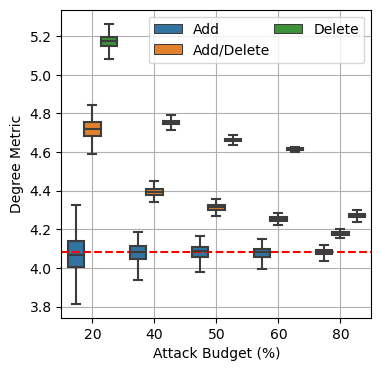

In [299]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='budget', y='DegreeMetric', hue='PerturbType', data=df, ax=ax, showfliers = False)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
ax.axhline(4.08, color = 'red', linestyle = '--')
make_legend_nice(ax, ['add', 'addremove', 'remove'])
ax.set_ylabel(r'Degree Metric'); 

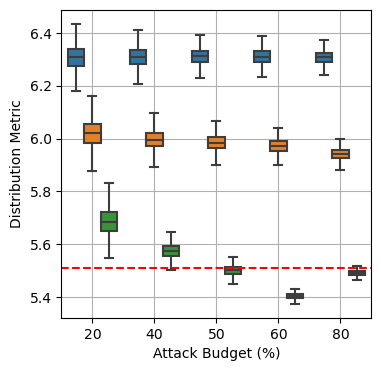

In [300]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='budget', y='DistMetric', hue='PerturbType', data=df, ax=ax, showfliers = False)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
ax.get_legend().remove()
ax.axhline(5.51, color = 'red', linestyle = '--')
ax.set_ylabel(r'Distribution Metric'); 

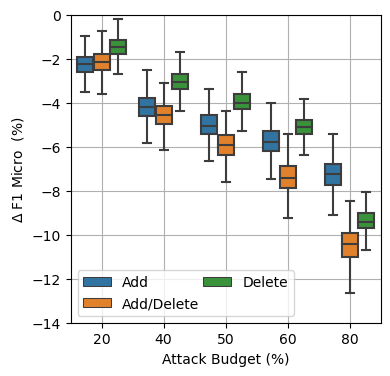

In [301]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='budget', y='AccuracyChange', hue='PerturbType', data=df, ax=ax, showfliers = False)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
make_legend_nice(ax, ['add', 'addremove', 'remove'])
ax.set_ylim(-14, 0)
ax.set_ylabel(r'$\Delta$ F1 Micro  (%)'); 


In [302]:
import matplotlib.patches as mpatches

addprops = {
    'boxprops':{'facecolor':'tab:blue', 'edgecolor':'tab:blue', 'linewidth' : 0.8},
    'medianprops':{'color':'darkslategray','linewidth' : 0.5 },
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
addremoveprops = {
    'boxprops':{'facecolor':'tab:orange', 'edgecolor':'darkslategray', 'linewidth' : 0.8},
    'medianprops':{'color':'darkslategray', 'linewidth' : 0.5},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

removeprops = {
    'boxprops':{'facecolor':'tab:green', 'edgecolor': 'darkslategray', 'linewidth' : 0.8},
    'medianprops':{'color':'darkslategray', 'linewidth' : 0.5},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

handles = [mpatches.Patch(color='tab:blue', label='Add'), \
mpatches.Patch(color='tab:orange', label='Add/Delete'), mpatches.Patch(color='tab:green', label='Delete')]




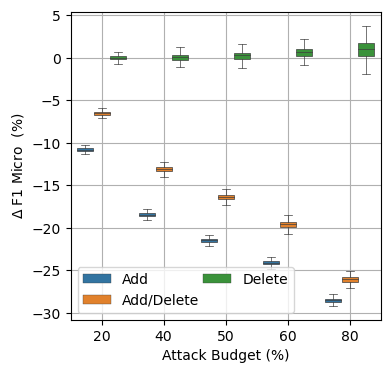

In [303]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='budget', y='HomophilyChange', hue='PerturbType', data=df, ax=ax, showfliers = False, linewidth= 0.5)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
make_legend_nice(ax, ['add', 'addremove', 'remove'])
ax.set_ylabel(r'$\Delta$ F1 Micro  (%)'); 


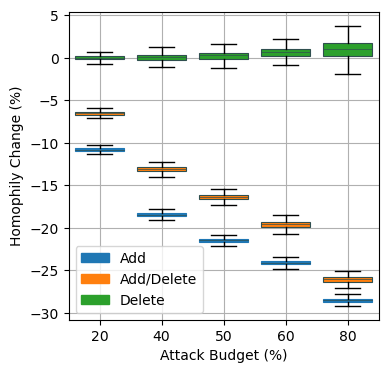

In [304]:

fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x=df[df.PerturbType == 'add']['budget'] - 10, y=df[df.PerturbType == 'add']['HomophilyChange'], ax=ax,linewidth = 1, labels = ['Add'],showfliers = False, **addprops)
sns.boxplot(x='budget', y='HomophilyChange', data=df[df.PerturbType == 'addremove'], ax=ax, linewidth = 1,showfliers = False, **addremoveprops)
sns.boxplot(x='budget', y='HomophilyChange', data=df[df.PerturbType == 'remove'], ax=ax, linewidth = 1, showfliers = False, **removeprops)

ax.legend(handles = handles)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
ax.set_ylabel(r'Homophily Change (%)'); 

In [305]:
df['budget-5'] = df.budget - 5

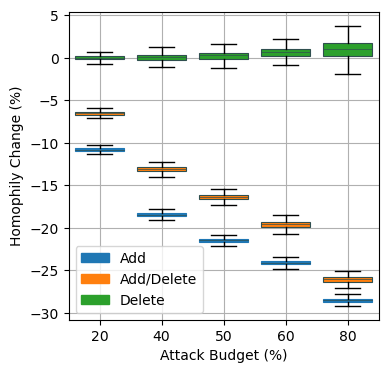

In [306]:

fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='budget-5', y='HomophilyChange', data=df[df.PerturbType == 'add'], ax=ax,linewidth = 1, labels = ['Add'],showfliers = False, **addprops)
sns.boxplot(x='budget', y='HomophilyChange', data=df[df.PerturbType == 'addremove'], ax=ax, linewidth = 1,showfliers = False, **addremoveprops)
sns.boxplot(x='budget', y='HomophilyChange', data=df[df.PerturbType == 'remove'], ax=ax, linewidth = 1, showfliers = False, **removeprops)

ax.legend(handles = handles)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
ax.set_ylabel(r'Homophily Change (%)'); 

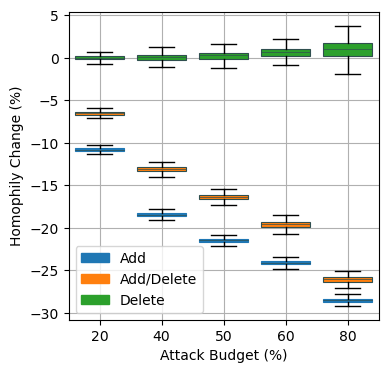

In [307]:

fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='budget', y='HomophilyChange', data=df[df.PerturbType == 'add'], ax=ax,linewidth = 1, labels = ['Add'],showfliers = False, **addprops)
sns.boxplot(x='budget', y='HomophilyChange', data=df[df.PerturbType == 'addremove'], ax=ax, linewidth = 1,showfliers = False, **addremoveprops)
sns.boxplot(x='budget', y='HomophilyChange', data=df[df.PerturbType == 'remove'], ax=ax, linewidth = 1, showfliers = False, **removeprops)

ax.legend(handles = handles)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
ax.set_ylabel(r'Homophily Change (%)'); 



In [308]:
r_iqr = df.groupby(['budget', 'PerturbType'])[['HomophilyChange']].quantile([0, 0.50, 1])

def generate_err(df, typ):
    x = []
    y = []
    err = []
    for budget in [20,40,50,60,80]:
        x.append(budget)
        y.append(df[budget, typ][0.5])
        err.append(df[budget,typ][1.0] - df[budget, typ][0.0])
    return x,y,err

xa, ya, erra = generate_err(r_iqr['HomophilyChange'], 'add')
xr, yr, errr = generate_err(r_iqr['HomophilyChange'], 'remove')
xar, yar, errar = generate_err(r_iqr['HomophilyChange'], 'addremove')



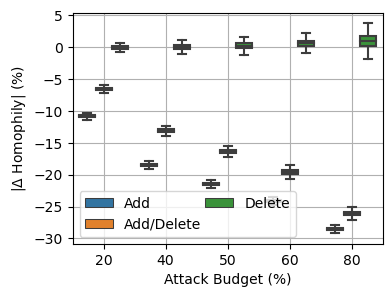

In [309]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.boxplot(x='budget', y='HomophilyChange', hue='PerturbType', data=df, ax=ax, showfliers = False)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
make_legend_nice(ax, ['add', 'addremove', 'remove'])
ax.set_ylabel(r'|$\Delta$ Homophily| (%)'); 



In [310]:
df_avg = df.groupby(['PerturbType', 'budget']).mean()

In [311]:
df_avg[['HomophilyChange']]

HomophilyChange
PerturbType budget                 
add         20           -10.809735
            40           -18.466260
            50           -21.496647
            60           -24.133652
            80           -28.514086
addremove   20            -6.576527
            40           -13.120002
            50           -16.353406
            60           -19.621482
            80           -26.089325
remove      20            -0.025250
            40             0.054660
            50             0.217058
            60             0.575081
            80             0.964113

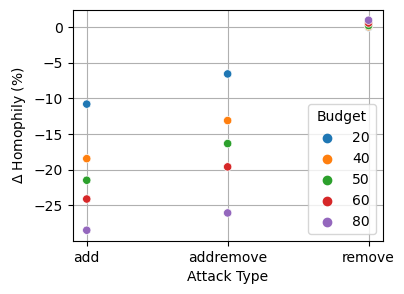

In [312]:
fig, ax = plt.subplots(figsize=(4, 3))
g = sns.scatterplot(x='PerturbType', y='HomophilyChange', hue='budget', data=df_avg, ax=ax, palette= 'tab10')
add_grid(ax)
ax.set_xlabel('Attack Type');
ax.set_ylabel(r'$\Delta$ Homophily (%)'); 
ax.legend(title = 'Budget')

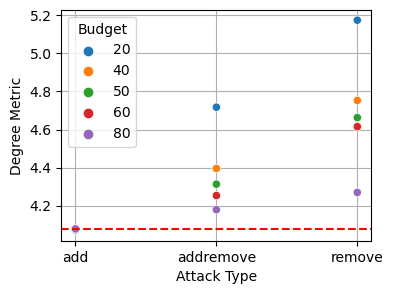

In [313]:
fig, ax = plt.subplots(figsize=(4, 3))
g = sns.scatterplot(x='PerturbType', y='DegreeMetric', hue='budget', data=df_avg, ax=ax, palette= 'tab10')
add_grid(ax)
g.axhline(4.08, color = 'red', linestyle = '--')
ax.set_xlabel('Attack Type');
ax.set_ylabel(r'Degree Metric'); 
ax.legend(title = 'Budget')

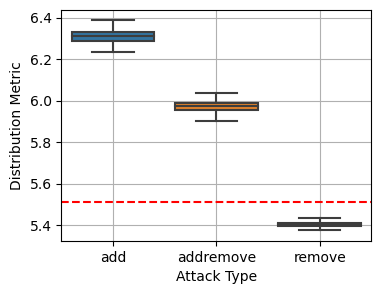

In [314]:

fig, ax = plt.subplots(figsize=(4, 3))
g = sns.boxplot(x='PerturbType', y='DistMetric', data=d60, ax=ax, showfliers = False)
add_grid(ax)
g.axhline(5.51, color = 'red', linestyle = '--')
ax.set_xlabel('Attack Type');
ax.set_ylabel(r'Distribution Metric'); 

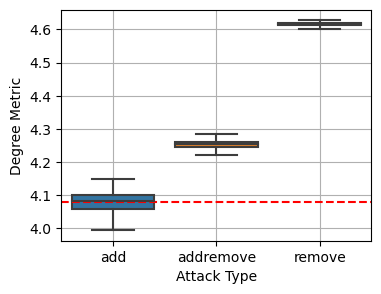

In [315]:
fig, ax = plt.subplots(figsize=(4, 3))
g = sns.boxplot(x='PerturbType', y='DegreeMetric', data=d60, ax=ax, showfliers = False)
add_grid(ax)
g.axhline(4.08, color = 'red', linestyle = '--')
ax.set_xlabel('Attack Type');
ax.set_ylabel(r'Degree Metric'); 


In [316]:
from scipy.stats import binom

def getprob(a, r):
    n = a + r
    k = a
    p = 0.5

    prob = (1 - binom.cdf(k - 1, n, p))

    return prob

In [317]:
gr = load_result_df(r'data/greedy-cp.csv')
gr = gr.sort_values(by='budget').reset_index(drop=True)
gr['percent_added'] = gr['add_count'] / (gr['add_count'] + gr['remove_count'])
gr['ar_prob'] = gr.apply(lambda row: getprob(row['add_count'],  row['remove_count']), axis=1)


In [321]:
gr.columns

Index(['budget', 'samples', 'method', 'test_loss', 'train_loss', 'val_loss',
       'f1_minor', 'f1_major', 'homophily', 'dist_metric', 'degree_metric',
       'add_count', 'remove_count', 'percent_added', 'ar_prob', 'd_f1min',
       'd_f1maj', 'd_hp', 'd_test', 'd_train', 'd_val', 'ar_ratio'],
      dtype='object')

In [332]:
_, _, _, test_loss, train_loss, val_loss, f1_min, f1_maj, hp = list(pd.read_csv('data/greedy_2000_val.csv', index_col= 0).iloc[0])
gr['d_f1min'] = (((f1_min - gr['f1_minor'])/ f1_min))*100
gr['d_f1maj'] = (((f1_maj - gr['f1_major'])/ f1_maj))*100
gr['d_hp'] = (((hp - gr['homophily'])/ hp)) *-100
gr['d_test'] = (((test_loss - gr['test_loss'])/ test_loss)) *-100
gr['d_train'] = (((train_loss - gr['train_loss'])/ train_loss)) *-100
gr['d_val'] = (((val_loss - gr['val_loss'])/ val_loss)) *-100
gr['ar_ratio'] = gr.add_count / gr.remove_count


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


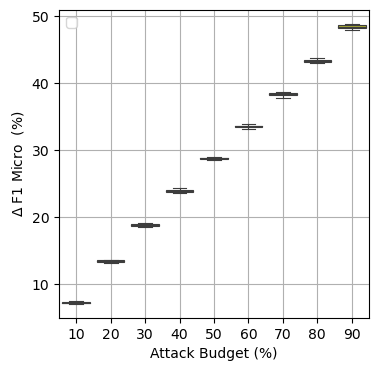

In [328]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='budget', y='d_hp', data=gr, ax=ax, showfliers = False, linewidth= 0.8)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
make_legend_nice(ax, ['add', 'addremove', 'remove'])
ax.set_ylabel(r'$\Delta$ F1 Micro  (%)'); 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


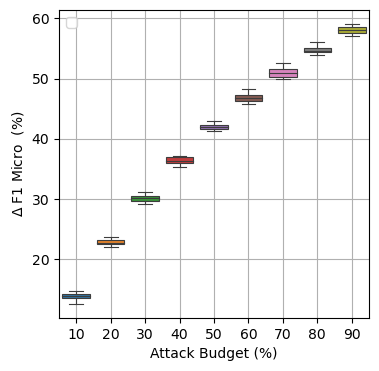

In [327]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='budget', y='d_f1min', data=gr, ax=ax, showfliers = False, linewidth= 0.8)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
make_legend_nice(ax, ['add', 'addremove', 'remove'])
ax.set_ylabel(r'$\Delta$ F1 Micro  (%)'); 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


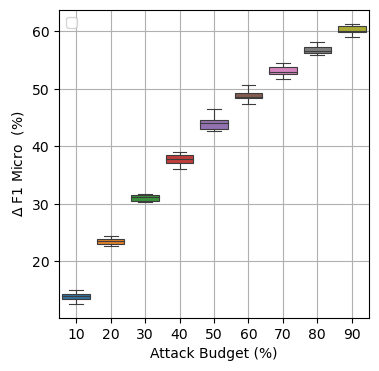

In [326]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='budget', y='d_f1maj', data=gr, ax=ax, showfliers = False, linewidth= 0.8)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
make_legend_nice(ax, ['add', 'addremove', 'remove'])
ax.set_ylabel(r'$\Delta$ F1 Micro  (%)'); 

In [205]:
gr_iqr = gr.groupby(['budget'])[['d_f1min', 'd_f1maj','d_hp', 'd_test', 'd_train', 'd_val' ]].quantile([0, 0.50, 1]).unstack()


In [283]:
gr_avg = gr.groupby(['budget']).mean()
gr_avg[['ar_prob']]

,ar_prob
budget,
10,0.000000e+00
20,0.000000e+00
30,0.000000e+00
40,0.000000e+00
50,1.603655e-16
60,1.873911e-09
70,1.378719e-04
80,6.843600e-02
90,7.009381e-01


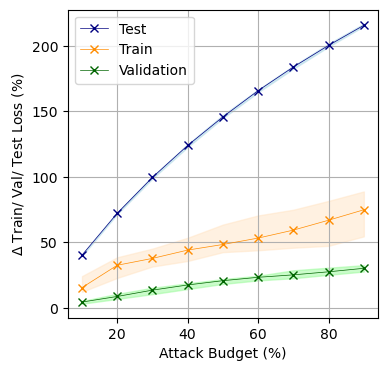

In [250]:
fig, ax = plt.subplots(figsize=(4, 4))
# create a bar plot of the average value by category
plt.plot(gr_iqr.index, gr_iqr['d_test'][0.50], 'x-', color = 'navy', linewidth = 0.5, label = 'Test')
plt.grid(True)
plt.fill_between(gr_iqr.index, gr_iqr['d_test'][0.0], gr_iqr['d_test'][1.0], color='lightblue', alpha=0.5)
plt.plot(gr_iqr.index, gr_iqr['d_train'][0.50], 'x-', color = 'darkorange',linewidth = 0.5, label = 'Train')
plt.fill_between(gr_iqr.index, gr_iqr['d_train'][0.0], gr_iqr['d_train'][1.0], color='bisque', alpha=0.5)
plt.plot(gr_iqr.index, gr_iqr['d_val'][0.50], 'x-', color = 'darkgreen', linewidth = 0.5, label = 'Validation')
plt.fill_between(gr_iqr.index, gr_iqr['d_val'][0.0], gr_iqr['d_val'][1.0], color='palegreen', alpha=0.5)
plt.xlabel('Attack Budget (%)');
plt.ylabel(r'$\Delta$ Train/ Val/ Test Loss (%)'); 
plt.legend()
plt.show()

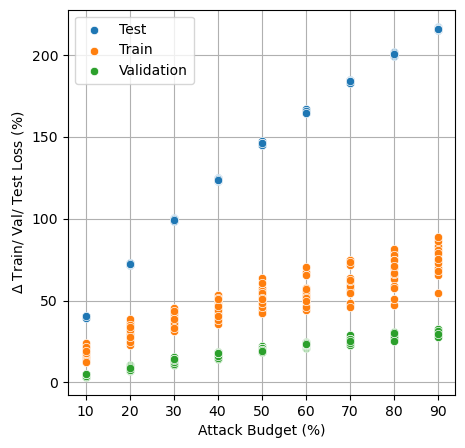

In [249]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x='budget', y='d_test', data=gr, ax=ax, label = 'Test')
sns.scatterplot(x='budget', y='d_train', data=gr, ax=ax, label = 'Train')
sns.scatterplot(x='budget', y='d_val', data=gr, ax=ax, label = 'Validation')
plt.legend()
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
plt.ylabel(r'$\Delta$ Train/ Val/ Test Loss (%)'); 


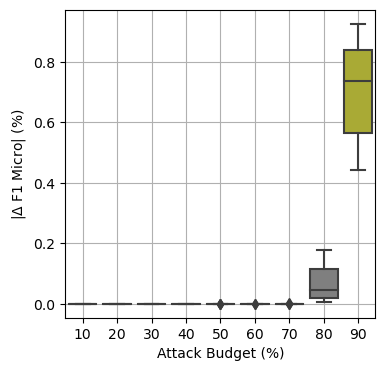

In [277]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='budget', y='ar_prob', data=gr, ax=ax)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
ax.set_ylabel(r'|$\Delta$ F1 Micro| (%)'); 


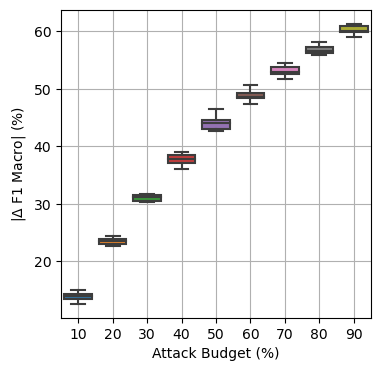

In [103]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(x='budget', y='d_f1maj', data=gr, ax=ax, showfliers = False)
add_grid(ax)
ax.set_xlabel('Attack Budget (%)');
ax.set_ylabel(r'|$\Delta$ F1 Macro| (%)'); 

In [353]:
df_iqr = df.groupby(['budget', 'PerturbType'])['HomophilyChange'].quantile([0, 0.25,0.50, 0.75, 1]).unstack()
df_add = df_iqr.loc[(slice(None), 'add'), :]
df_remove = df_iqr.loc[(slice(None), 'remove'), :]
df_addremove = df_iqr.loc[(slice(None), 'addremove'), :]


In [358]:
df_add

,,0.00,0.25,0.50,0.75,1.00
budget,PerturbType,,,,,
20,add,-11.479388,-10.956939,-10.810000,-10.679388,-10.205918
40,add,-19.234676,-18.635874,-18.454841,-18.301659,-17.535749
50,add,-22.301541,-21.665838,-21.510156,-21.328526,-20.640929
60,add,-25.006892,-24.302666,-24.120539,-23.950554,-23.428456
80,add,-29.323043,-28.688089,-28.515898,-28.343706,-27.622656


ValueError: setting an array element with a sequence.

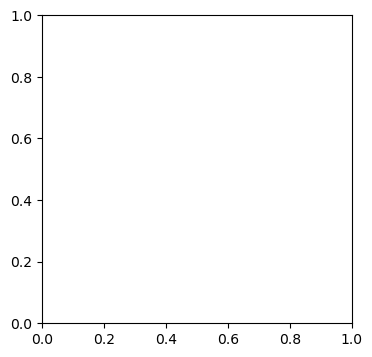

In [355]:
df_iqr = df.groupby(['budget'])[['PerturbType','HomophilyChange']].quantile([0, 0.25,0.50, 0.75, 1]).unstack()
fig, ax = plt.subplots(figsize=(4, 4))
# create a bar plot of the average value by category
plt.plot(df_add.index, df_add[0.50], 'x-', color = 'navy', linewidth = 0.5, label = 'Test')
plt.grid(True)
plt.fill_between(df_add.index, df_add[0.0], df_add[1.0], color='lightblue', alpha=0.5)
plt.plot(df_remove.index, df_remove[0.50], 'x-', color = 'darkorange',linewidth = 0.5, label = 'Train')
plt.fill_between(df_remove.index, df_remove[0.0], df_remove[1.0], color='bisque', alpha=0.5)
plt.plot(df_addremove.index, df_addremove[0.50], 'x-', color = 'darkgreen', linewidth = 0.5, label = 'Validation')
plt.fill_between(df_addremove.index, df_addremove[0.0], df_addremove[1.0], color='palegreen', alpha=0.5)
plt.xlabel('Attack Budget (%)');
plt.ylabel(r'$\Delta$ Train/ Val/ Test Loss (%)'); 
plt.legend()
plt.show()

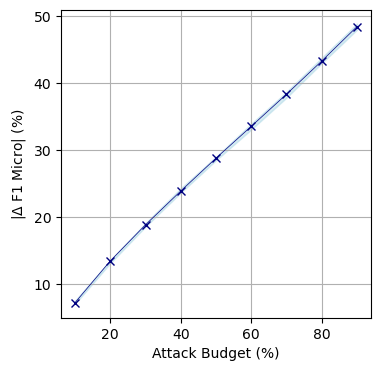

In [330]:
gr_iqr = gr.groupby(['budget'])['d_hp'].quantile([0, 0.25,0.50, 0.75, 1]).unstack()
# create a bar plot of the average value by category
fig = plt.figure(figsize=(4, 4))
plt.plot(gr_iqr.index, gr_iqr[0.50], 'x-', color = 'navy', linewidth = 0.5,)
plt.grid(True)
plt.fill_between(gr_iqr.index, gr_iqr[0.0], gr_iqr[1.0], color='lightblue', alpha=0.5)
plt.xlabel('Attack Budget (%)');
plt.ylabel(r'|$\Delta$ F1 Micro| (%)'); 
# plt.yscale('log')
plt.show()

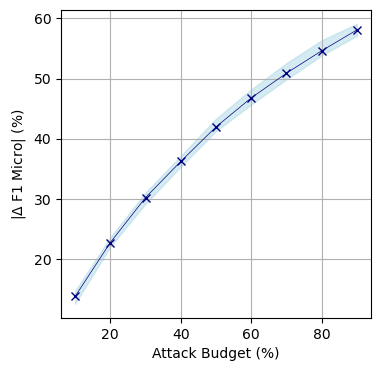

In [254]:
gr_iqr = gr.groupby(['budget'])['d_f1min'].quantile([0, 0.25,0.50, 0.75, 1]).unstack()
# create a bar plot of the average value by category
fig = plt.figure(figsize=(4, 4))
plt.plot(gr_iqr.index, gr_iqr[0.50], 'x-', color = 'navy', linewidth = 0.5)
plt.grid(True)
plt.fill_between(gr_iqr.index, gr_iqr[0.0], gr_iqr[1.0], color='lightblue', alpha=0.5)
plt.xlabel('Attack Budget (%)');
plt.ylabel(r'|$\Delta$ F1 Micro| (%)'); 
plt.show()

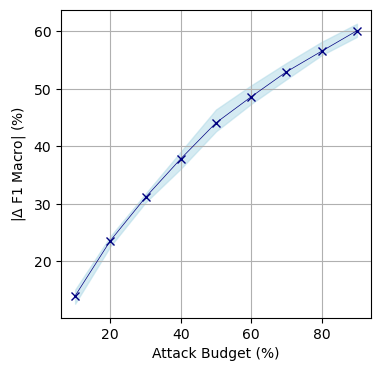

In [252]:
gr_iqr = gr.groupby(['budget'])['d_f1maj'].quantile([0, 0.25,0.50, 0.75, 1]).unstack()
# create a bar plot of the average value by category
fig = plt.figure(figsize=(4, 4))
plt.plot(gr_iqr.index, gr_iqr[0.50], 'x-', color = 'navy', linewidth = 0.5)
plt.grid(True)
plt.fill_between(gr_iqr.index, gr_iqr[0.0], gr_iqr[1.0], color='lightblue', alpha=0.5)
plt.xlabel('Attack Budget (%)');
plt.ylabel(r'|$\Delta$ F1 Macro| (%)'); 
plt.show()

In [323]:
pd.read_csv('data/benchmark.csv', index_col= 0)

,bench_acc,bench_dist,bench_deg
0,0.806775,6.152361,4.779975
1,0.795557,6.136137,4.553326
2,0.784265,6.108176,4.433520
3,0.773631,6.081842,4.349180
4,0.760334,6.049843,4.291755
...,...,...,...
154,0.773367,6.086109,4.342218
155,0.760567,6.052424,4.289404
156,0.747206,6.025757,4.243555
157,0.734070,5.981078,4.214031
